<a href="https://colab.research.google.com/github/RyuJungSoo/2022_winter_ai_study/blob/main/MNIST_%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B8%EC%8B%9D%ED%95%98%EA%B8%B0_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [2]:
# seed 값 설정 
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255  # 28x28 이면서 흑백인 데이터를 쓸 것이기 때문에 차원 맞춰주기, 케라스가 최적의 성능을 보이도록 255로 나누기
X_test = X_test.reshape(X_test.shape[0],28, 28, 1).astype('float32') / 255   # 28x28 이면서 흑백인 데이터를 쓸 것이기 때문에 차원 맞춰주기, 케라스가 최적의 성능을 보이도록 255로 나누기

In [5]:
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


In [6]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # convolution 층 1
model.add(Conv2D(64, (3,3), activation='relu')) # convolution 층 2
model.add(MaxPooling2D(pool_size=2)) # 맥스 풀링
model.add(Dropout(0.25)) # 드롭아웃 25%
model.add(Flatten()) # 플래튼 (Dense 레이어를 쓰기 위해 1차원 배열로 변환)
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) # 드롭아웃 50%
model.add(Dense(10, activation='softmax'))

In [7]:
# 모델 실행 환경 설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 최적화 설정
MODEL_DIR = '../model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "../model/{epoch: 02d}-{val_loss: .4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, svae_best_only = True) # 오차가 개선될 때만 모델 저장
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10번 반복해도 오차가 개선되지 않으면 중지

In [8]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size = 200, verbose = 0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: saving model to ../model/ 1- 0.0547.hdf5

Epoch 00002: saving model to ../model/ 2- 0.0400.hdf5

Epoch 00003: saving model to ../model/ 3- 0.0368.hdf5

Epoch 00004: saving model to ../model/ 4- 0.0343.hdf5

Epoch 00005: saving model to ../model/ 5- 0.0316.hdf5

Epoch 00006: saving model to ../model/ 6- 0.0283.hdf5

Epoch 00007: saving model to ../model/ 7- 0.0315.hdf5

Epoch 00008: saving model to ../model/ 8- 0.0293.hdf5

Epoch 00009: saving model to ../model/ 9- 0.0308.hdf5

Epoch 00010: saving model to ../model/ 10- 0.0339.hdf5

Epoch 00011: saving model to ../model/ 11- 0.0305.hdf5

Epoch 00012: saving model to ../model/ 12- 0.0285.hdf5

Epoch 00013: saving model to ../model/ 13- 0.0260.hdf5

Epoch 00014: saving model to ../model/ 14- 0.0301.hdf5

Epoch 00015: saving model to ../model/ 15- 0.0291.hdf5

Epoch 00016: saving model to ../model/ 16- 0.0251.hdf5

Epoch 00017: saving model to ../model/ 17- 0.0283.hdf5

Epoch 00018: saving model to ../model/ 18- 0.0283.hdf5



In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0322 - accuracy: 0.9923

 Test Accuracy: 0.9923


In [10]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

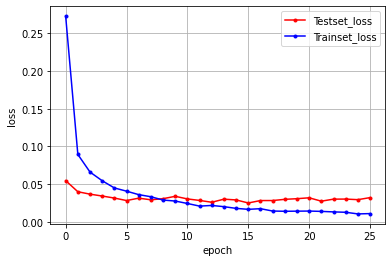

In [11]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = "blue", label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()